<a href="https://colab.research.google.com/github/kmk028/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [15]:
#Load the data as a pandas data frame.

import pandas as pd


df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",header=None)

#Validate that it has the appropriate number of observations 
df.shape

(306, 4)

In [16]:
#Validate that you have no missing values.
df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [18]:
# Add informative names to the features. 

column_headers = ['Age','Year of Operation','Num of auxillary nodes','Survival Status']
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",header=None,names=column_headers)
df.sample(10)

,Age,Year of Operation,Num of auxillary nodes,Survival Status
47,41,59,8,1
71,43,65,0,1
116,49,61,1,1
70,43,63,2,1
124,50,63,13,2
170,54,68,7,2
179,54,62,0,1
152,52,62,1,1
164,53,60,2,1
17,36,69,0,1


In [24]:

# The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)
df['Survival Status'].replace(2,0,inplace = True)
df.head()

,Age,Year of Operation,Num of auxillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [27]:
df.dtypes

Age                       int64
Year of Operation         int64
Num of auxillary nodes    int64
Survival Status           int64
dtype: object

In [31]:
df.max()

Age                       83
Year of Operation         69
Num of auxillary nodes    52
Survival Status            1
dtype: int64

In [32]:
df.min()

Age                       30
Year of Operation         58
Num of auxillary nodes     0
Survival Status            0
dtype: int64

In [49]:
import numpy as np
age_bins = pd.cut(df['Age'], bins=5)

pd.crosstab(df['Survival Status'],age_bins.astype(str),normalize = 'columns')

Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Survival Status,,,,,
0,0.093023,0.313131,0.28125,0.271186,0.333333
1,0.906977,0.686869,0.71875,0.728814,0.666667


In [58]:
Num_aux_nodes_bins = pd.cut(df['Num of auxillary nodes'], bins=4)

pd.crosstab(df['Survival Status'],Num_aux_nodes_bins.astype(str),normalize = 'columns')

Num of auxillary nodes,"(-0.052, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]"
Survival Status,,,,
0,0.238267,0.541667,0.333333,0.5
1,0.761733,0.458333,0.666667,0.5


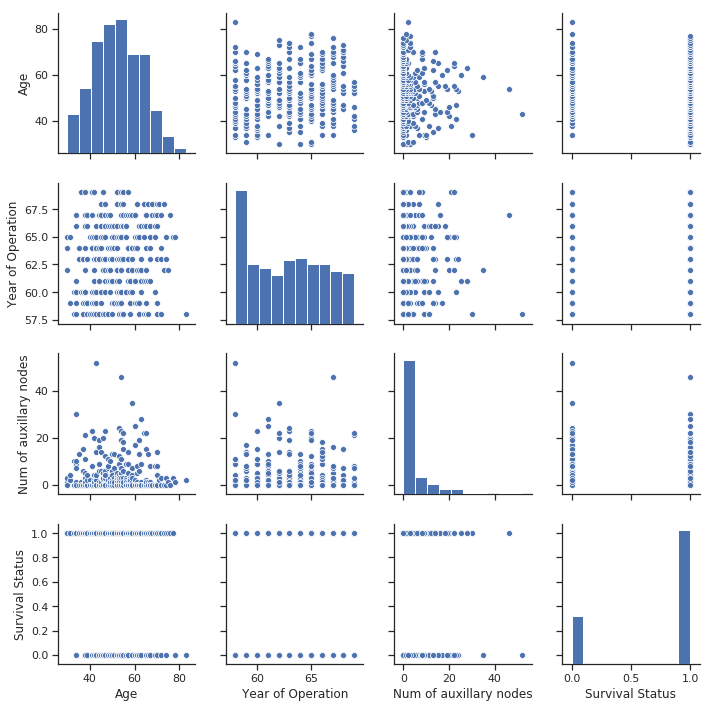

In [53]:
import seaborn as sns
sns.set(style='ticks', color_codes=True)
sns.pairplot(df)

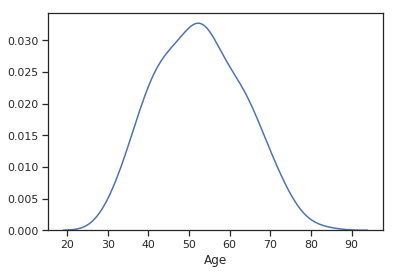

In [54]:
sns.distplot(df['Age'], hist=False)

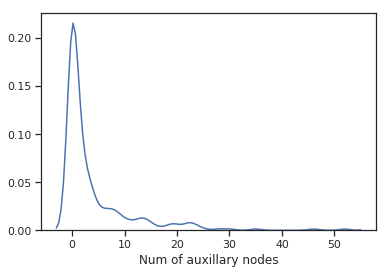

In [55]:
sns.distplot(df['Num of auxillary nodes'], hist=False)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

From the cross Tab, 
Lesser the age the better chances of survival. 
Eg: If age is <40 chances of survival is almost 90.7%


more the Number of Auxillary nodes, Lesserr the chances of survival 
Eg frrom cross tab, 76% chance of survival when num of aux nodes is less than 13


From 2 features above we can see lesser the num of aux nodes and lesser the age chances of survival is high. 